<a href="https://colab.research.google.com/github/Maria-Miroshnikova/pm-pu/blob/main/python/anime_and_graphic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tempur

<function matplotlib.pyplot.show>

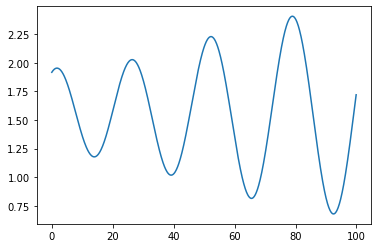

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import math

# graphic

t = np.arange(0,100,0.1)
temperature = np.arctan(-0.0012 * t ** 3 + 0.4 * t ** 2 + 0.616 * t + 6120) + 0.65 * np.sin(0.24 * t + 1.23) - 0.27 * np.cos(0.21 * t - 0.17) - (np.sin(0.34 * t + 0.16)) / (1 + 0.03 * (t - 370.5) ** 2)
plt.plot(t, temperature)
plt.show

anime

In [65]:
# 1, 2
import pandas as pd

data = pd.read_csv("anime.csv")
for i in range(3):
  print(data.loc[i])
  print('------')

Title                   Shingeki no Kyojin
Production                      Wit Studio
Episodes                                25
Source                               Manga
Genre         Action,Drama,Fantasy,Mystery
Airdate           Apr 7, 2013, 01:58 (JST)
Rating                                8.52
Voters                           3,142,121
Theme                 Military,Super Power
Name: 0, dtype: object
------
Title              Fullmetal Alchemist: Brotherhood
Production                                    Bones
Episodes                                         64
Source                                        Manga
Genre         Action,Adventure,Comedy,Drama,Fantasy
Airdate                    Apr 5, 2009, 17:00 (JST)
Rating                                         9.16
Voters                                    2,676,911
Theme                                      Military
Name: 1, dtype: object
------
Title                         Sword Art Online
Production                        A-1 

In [67]:
# 3

column_names = data.columns
for name in column_names:
  print("{} : {}".format(name, pd.api.types.infer_dtype(data[name])))

Title : string
Production : string
Episodes : string
Source : string
Genre : string
Airdate : string
Rating : floating
Voters : string
Theme : string


In [68]:
# 4
for name in column_names:
  data.rename(columns = { name : name.lower()}, inplace=True)
column_names = data.columns
for name in column_names:
  print("{} : {}".format(name, data[name].dtype))
numerical = set({'episodes', 'airdate', 'rating', 'voters'})
categorical = set(column_names) - numerical
#print(categorical)

title : object
production : object
episodes : object
source : object
genre : object
airdate : object
rating : float64
voters : object
theme : object


In [6]:
# 5
for column in numerical:
  print(data[column].describe())
  print('------')

count     1992
unique     100
top          1
freq       625
Name: episodes, dtype: object
------
count    1944.000000
mean        7.150849
std         0.709454
min         2.960000
25%         6.720000
50%         7.210000
75%         7.590000
max         9.160000
Name: rating, dtype: float64
------
count             1020
unique             960
top       ??? ??, ????
freq                13
Name: airdate, dtype: object
------
count      1992
unique     1978
top       8,986
freq          2
Name: voters, dtype: object
------


In [32]:
genres_dict = dict()
themes_dict = dict()
genres = set()
themes = set()
for i in range(data.shape[0]):
  genres_dict[data.loc[i]['title']] = set(data.loc[i]['genre'].split(','))
  genres = genres.union(genres_dict[data.loc[i]['title']])
  themes_dict[data.loc[i]['title']] = set(data.loc[i]['theme'].split(','))
  themes = themes.union(themes_dict[data.loc[i]['title']])

genre_count = dict()
for anime, g_set in genres_dict.items():
  for genre in g_set:
    if genre not in genre_count:
      genre_count[genre] = 1
    else:
      genre_count[genre] = genre_count[genre] + 1
theme_count = dict()
for anime, t_set in themes_dict.items():
  for theme in t_set:
    if theme not in theme_count:
      theme_count[theme] = 1
    else:
      theme_count[theme] = theme_count[theme] + 1
print(genres)
print(themes)

{'Action', 'Slice of Life', 'Work Life', 'Comedy', 'Supernatural', 'Ecchi', 'Avant Garde', 'Romance', 'Horror', 'Drama', 'Mystery', 'Fantasy', 'Gourmet', 'Adventure', 'Sci-Fi', 'Girls Love', 'Boys Love', 'Suspense', 'Sports'}
{'Tokyopop', 'Urban Vision', 'Psychological', 'Parody', 'Aniplex of America', 'School', 'Cars', 'Seinen', 'Ponycan USA', 'Sentai Filmworks', 'Shounen', 'Discotek Media', 'Crunchyroll', 'Warner Bros. Japan', 'Vampire', 'Martial Arts', 'AnimEigo', 'Nozomi Entertainment', 'VIZ Media', 'Super Power', 'Bandai Entertainment', 'Netflix', 'Anchor Bay Films', 'Funimation', 'ADV Films', 'Shout! Factory', 'Police', 'Demons', 'Samurai', 'Maiden Japan', 'Kids', 'NYAV Post', 'Space', 'Military', 'Historical', 'Music', 'Manga Entertainment', 'Game', 'Harem', '-', 'Media Blasters', 'Flatiron Film Company', 'GKIDS', 'Geneon Entertainment USA', 'Shoujo', 'Mecha', 'bilibili', 'Josei', 'Central Park Media', 'OLM Digital'}


In [8]:
# 6
for column in categorical:
  if (column == 'genre'):
    print(genre_count)
  elif (column == 'theme'):
    print(theme_count)
  else:
    print(data[column].value_counts())
    print('-----')

Manga           818
Original        468
Light novel     263
Game            201
Novel            61
Visual novel     51
Other            48
-                39
Web manga        32
Card game         9
Book              1
Picture book      1
Name: source, dtype: int64
-----
Toei Animation         130
Sunrise                125
Madhouse                83
A-1 Pictures            78
Bones                   73
                      ... 
Nakamura Production      1
Anima&Co.                1
G&G Entertainment        1
Fifth Avenue             1
Vega Entertainment       1
Name: production, Length: 224, dtype: int64
-----
Shingeki no Kyojin                                      1
Ginga Eiyuu Densetsu: Arata Naru Tatakai no Overture    1
Mobile Suit Gundam AGE                                  1
Atom: The Beginning                                     1
Hellsing: Psalm of the Darkness                         1
                                                       ..
Mai-HiME                        

In [ ]:
# 7

#data_filled = data.fillna(data.mean())
#print(data_filled)

In [9]:
#8
companies = data['production'].unique()
company_anime_stat_dict = dict()
for company in companies:
   company_anime_stat_dict[company] = set()
for i in range(data.shape[0]):
  company = data.loc[i]['production']
  anime = data.loc[i]['title']
  company_anime_stat_dict[company].add(anime)
#for company, anime_set in company_anime_stat_dict.items():
#  print("{} : {}".format(company, len(anime_set)))

[('Science SARU', 1), ('TROYCA', 1), ('Pine Jam', 1), ('Maho Film', 1), ('EKACHI EPILKA', 1), ('Studio Colorido', 1), ('Shin-Ei Animation', 1), ('ENGI', 1), ('Namu Animation', 1), ("Children's Playground Entertainment", 1), ('XEBEC M2', 1), ('Lapin Track', 1), ('Creators in Pack', 1), ('China Literature Limited', 1), ('Bakken Record', 1), ('Tsuchida Productions', 1), ('Visual Flight', 1), ('A-Real', 1), ('Blade', 1), ('l-a-unch・BOX', 1), ('LandQ studios', 1), ('Minami Machi Bugyousho', 1), ('Shirogumi', 1), ('Studio Animal', 1), ('Kamikaze Douga', 1), ('Fifth Avenue', 1), ('G&G Entertainment', 1), ('Anima&Co.', 1), ('Nakamura Production', 1), ('The Answer Studio', 1), ('Nice Boat Animation', 1), ('View Works', 1), ('Think Corporation', 1), ('L²Studio', 1), ('Yumeta Company', 1), ('Yokohama Animation Lab', 1), ('CyberConnect2', 1), ('Kitty Film Mitaka Studio', 1), ('Studio Kai', 1), ('Tokyo Kids', 1), ('TAKI Corporation', 1), ('Craftar Studios', 1), ('Studio Flag', 1), ('CoMix Wave Film

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


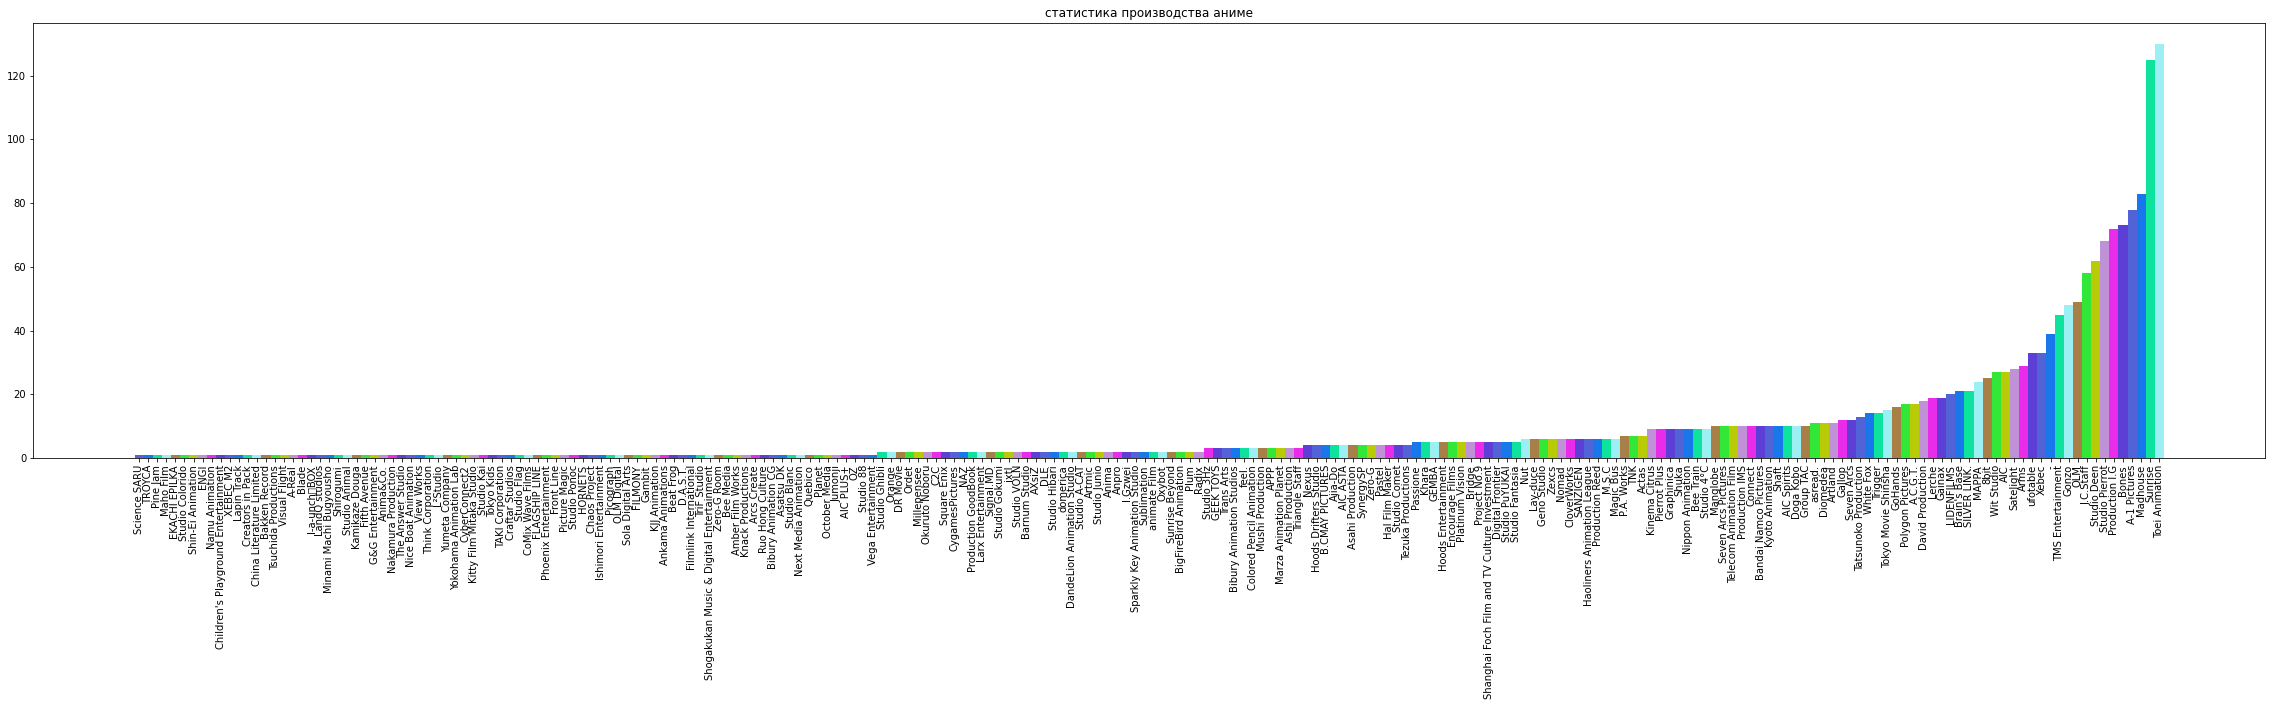

In [10]:
import matplotlib.pyplot as plt

company_count_dict = dict()
for company, anime_set in company_anime_stat_dict.items():
  company_count_dict[company] = len(anime_set)

company_count_dict_sorted = sorted(company_count_dict.items(), key=lambda item: item[1])
print(company_count_dict_sorted)
company_list = list()
count_list = list()
for i in company_count_dict_sorted:
  company_list.append(i[0])
  count_list.append(i[1])


#indexes = np.arange(len(company_count_dict))
#print(indexes)
#print(company_count_dict.values())
#plt.bar(indexes, list(company_count_dict.values()))
#plt.xticks(list(company_count_dict.keys()))
#plt.show()

c = np.random.rand(10,3)
fig = plt.figure(figsize=(40,8))
plt.bar(company_list, count_list, width=1, color=c)
plt.title("статистика производства аниме")
plt.xticks(rotation=90)
plt.show()

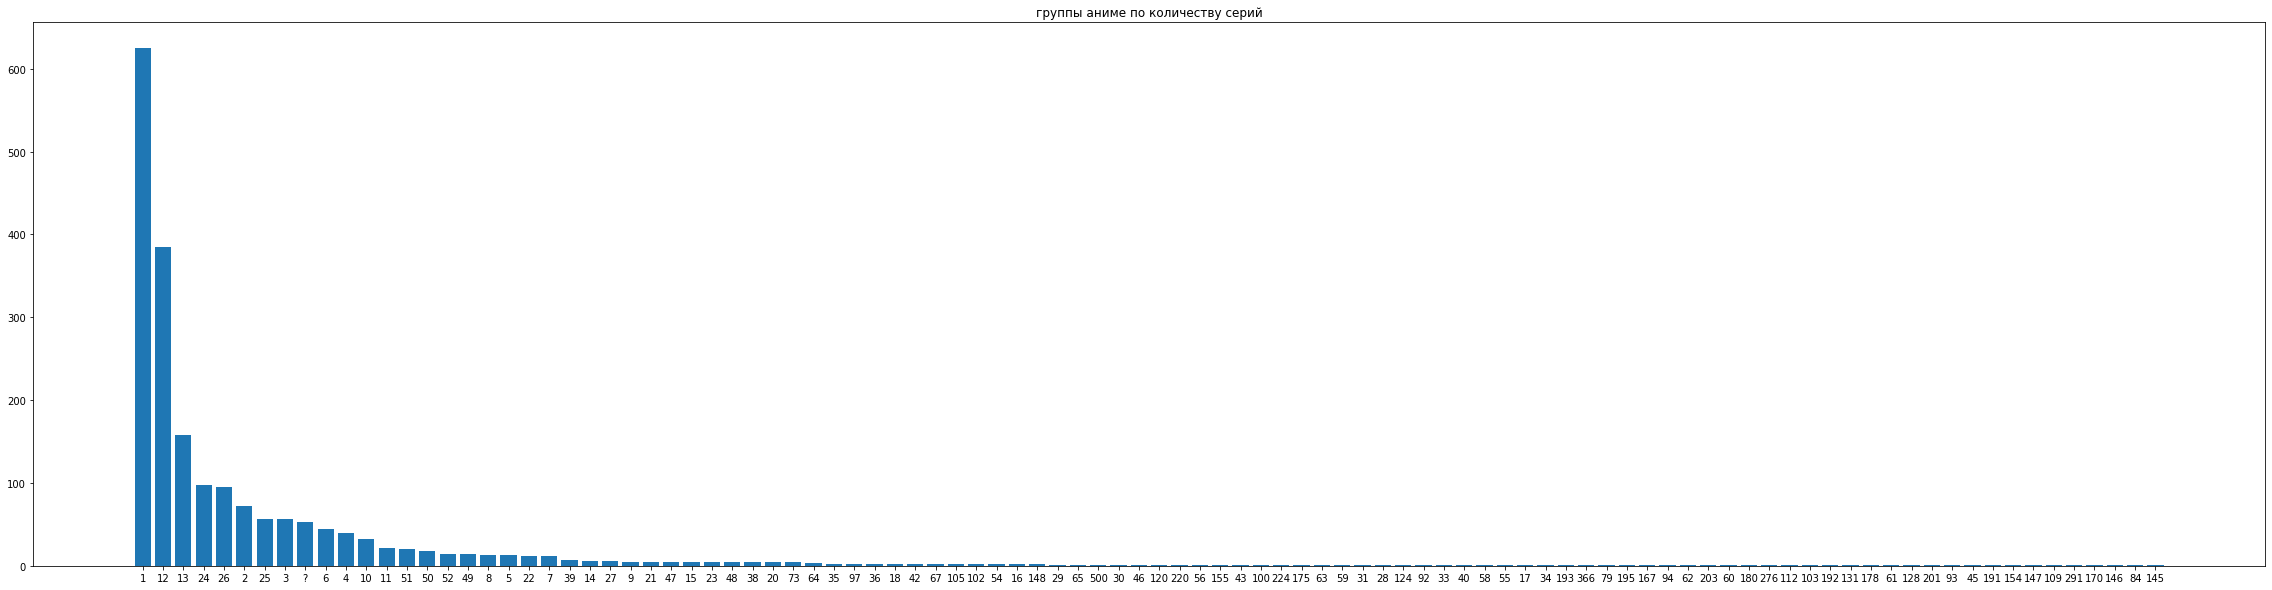

In [11]:
#data['episodes'].value_counts()
count_of_series = data['episodes'].value_counts().keys()
group_with_this_count = data['episodes'].value_counts().values
#print(count_of_series)
#print(group_with_this_count)
fig = plt.figure(figsize=(40,10))
plt.bar(count_of_series, group_with_this_count)
plt.title("группы аниме по количеству серий")
plt.show()
#print(data['episodes'] == 1)

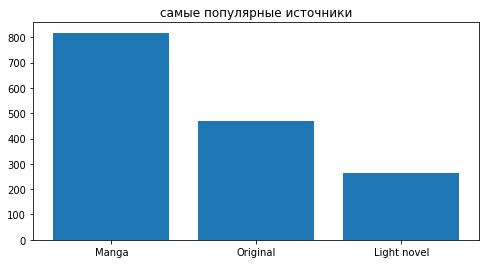

In [12]:
most_popular = data['source'].value_counts()
most_3 = most_popular[:3]
fig = plt.figure(figsize=(8,4))
plt.bar(most_3.keys(), most_3.values)
plt.title("самые популярные источники")
plt.show()
#print(most_3)

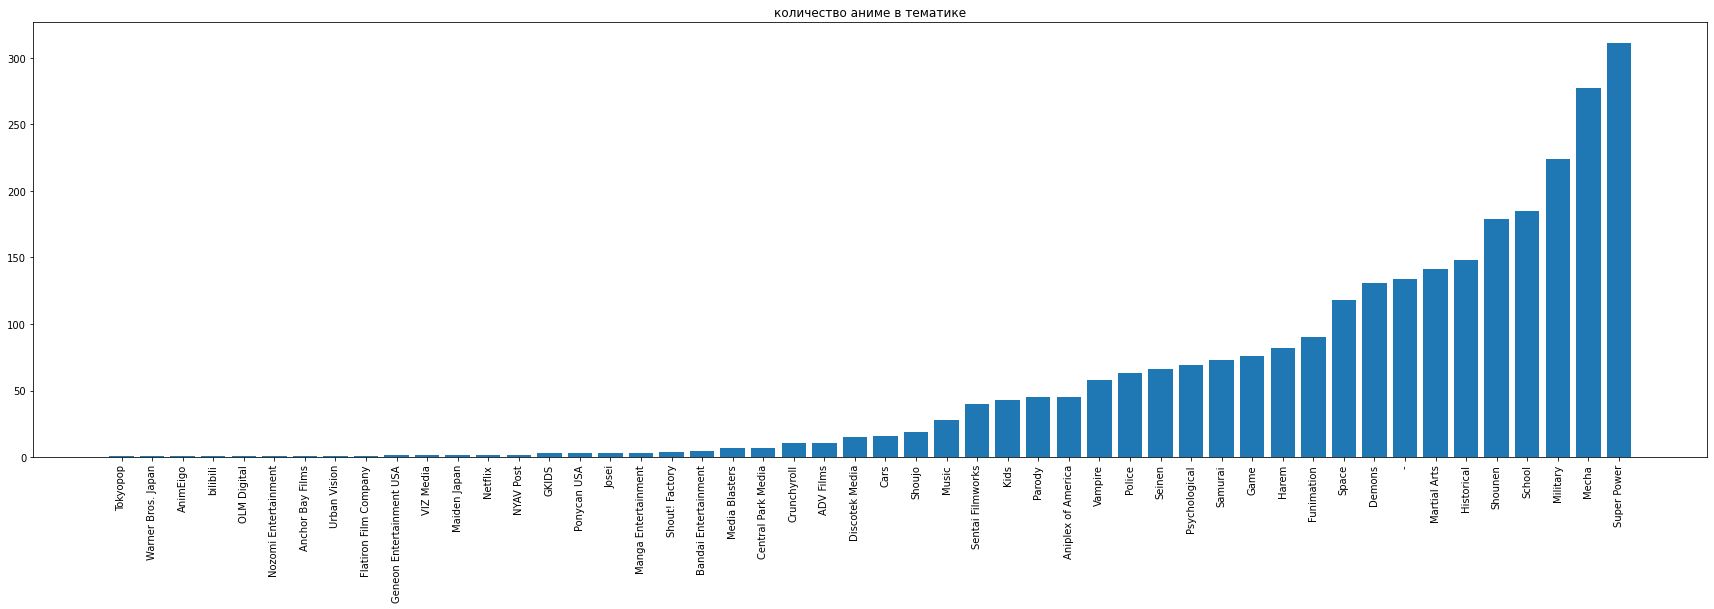

In [13]:
theme_count_sorted = sorted(theme_count.items(), key=lambda item: item[1])
themes = list()
theme_counts = list()
for i in theme_count_sorted:
  themes.append(i[0])
  theme_counts.append(i[1])
fig = plt.figure(figsize=(30,8))
plt.bar(themes, theme_counts)
plt.title("количество аниме в тематике")
plt.xticks(rotation=90)
plt.show()

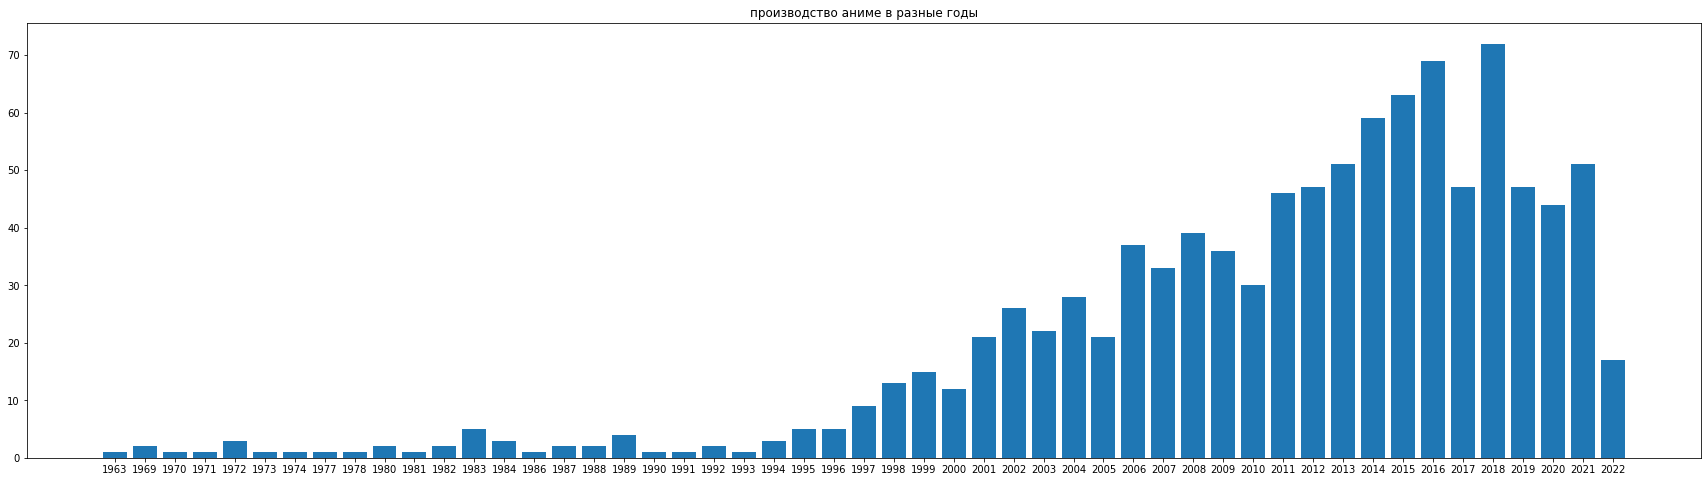

In [14]:
import re

regex_year = re.compile('\d{4}')
#print(regex_year.findall(data['airdate'][3]))
years = list()
year_default = "0"
for i in range(data.shape[0]):
  date = str(data['airdate'][i])
  found_year = regex_year.findall(date)
  if len(found_year) > 0:
    years.append(found_year[0])
  else:
    years.append(year_default)
#print(years)
#name = 'year'
data = data.assign(year = years)
#print(new_data)
year_anime_count = data['year'].value_counts()
year_anime_count = (year_anime_count.sort_index())
year_anime_count = year_anime_count.drop(year_anime_count.index[0])
#print(year_anime_count)
fig = plt.figure(figsize=(30,8))
plt.bar(year_anime_count.keys(), year_anime_count.values)
plt.title("производство аниме в разные годы")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12539 missing from current font.
  font.set_text(s, 0, flags=flags)


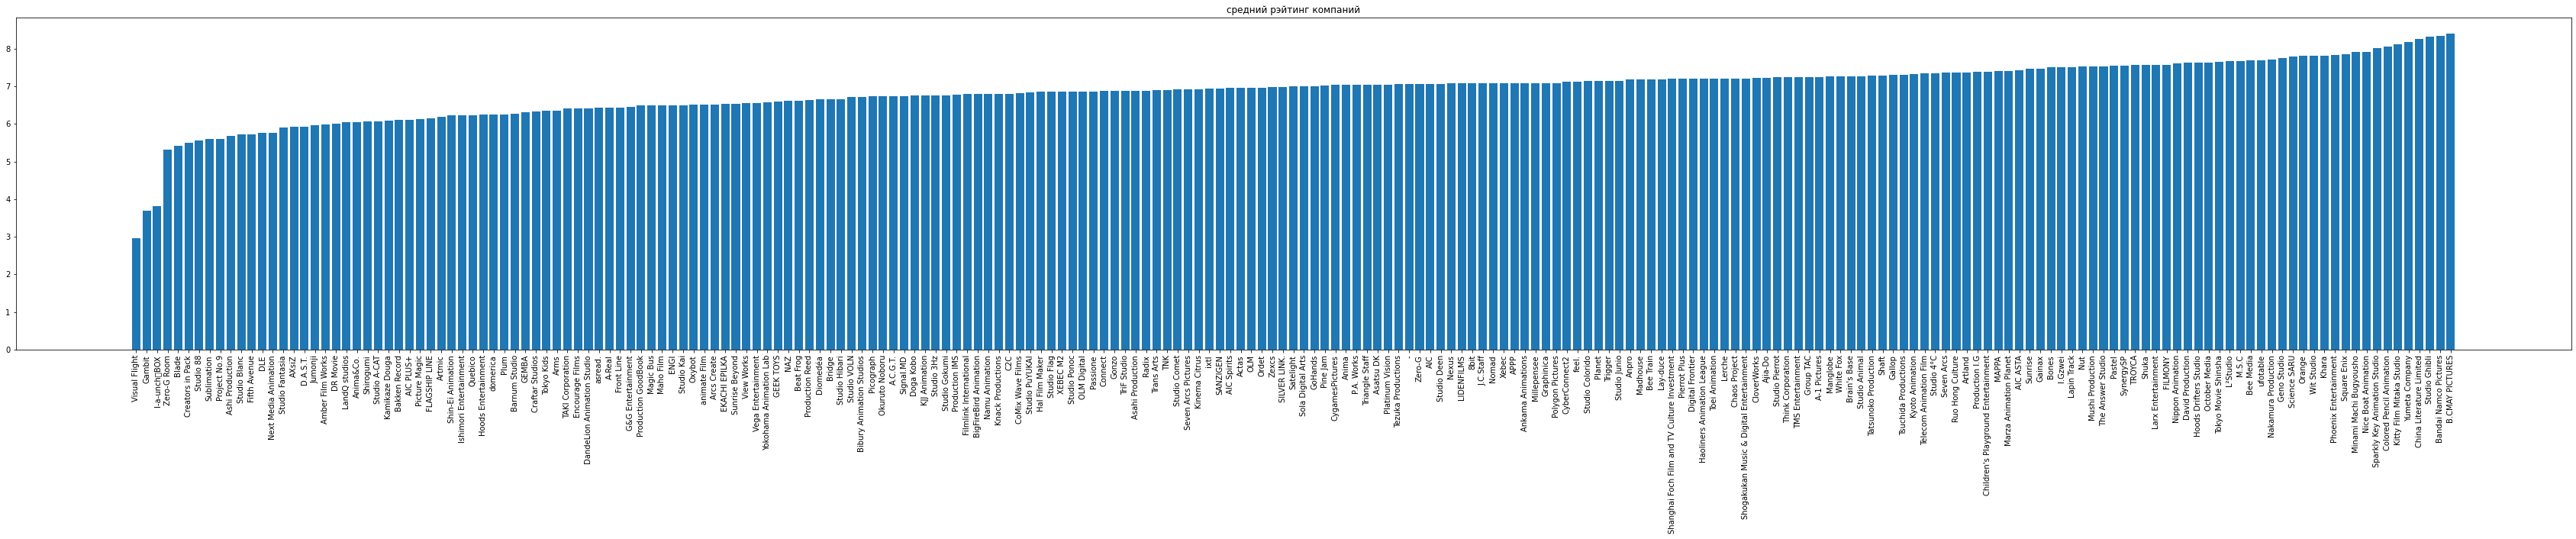

Top-3 Companies with highest rating: Studio Ghibli, Bandai Namco Pictures, B.CMAY PICTURES


In [15]:
#print(companies)
company_rating_dict = dict()
for company in companies:
  company_data = data.loc[data.production == company]
  if np.isnan(company_data['rating'].mean()):
    continue
  company_rating_dict[company] = float(company_data['rating'].mean())

company_rating_dict = sorted(company_rating_dict.items(), key=lambda item: item[1])
company_sorted = list()
rating_sorted = list()
for i in company_rating_dict:
  company_sorted.append(i[0])
  rating_sorted.append(i[1])

fig = plt.figure(figsize=(60,8))
plt.bar(company_sorted, rating_sorted)
plt.title("средний рэйтинг компаний")
plt.xticks(rotation=90)
plt.show()

print('Top-3 Companies with highest rating: {}, {}, {}'.format(company_sorted[-3], company_sorted[-2], company_sorted[-1]))

In [83]:

#ОДИН РАЗ ЗАПУСТИТЬ и все!

for i in range(data.shape[0]):
  voters = data.loc[i]['voters']
  print(voters)
  voters = re.sub(',', '', voters)
  vot = int(voters)
  data.at[i, 'voters'] = vot
  #print(data.loc[i]['voters'])
  #break

3142121


TypeError: ignored

[0, 0, 68417, 76048, 172399, 4630096, 44993862, 169361979, 96874550, 7686630]
[0, 0, 1, 2, 7, 94, 619, 1015, 199, 7]


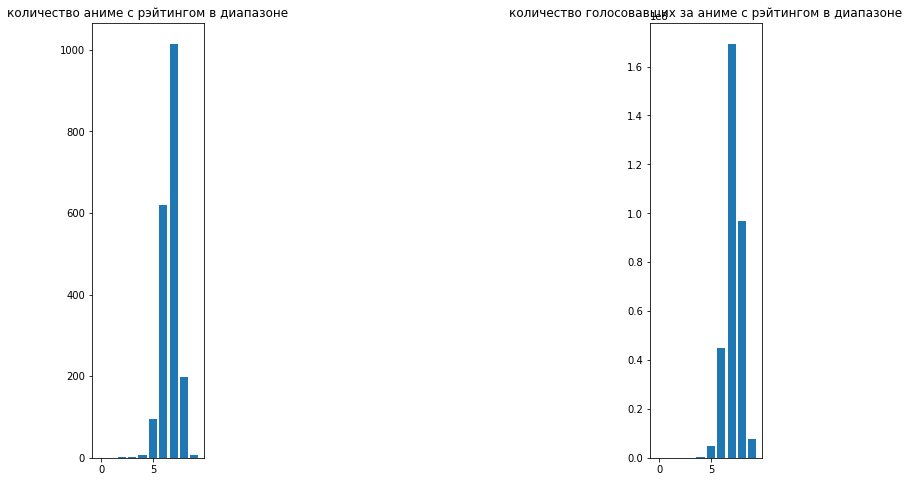

Most popular interval: [7, 8)


In [135]:
#print((data.sort_values(by='rating'))['title'])

animes = data['title'].unique()
rating_groups = [0] * 10
voters_in_group = [0] * 10
#print(voters_in_group)
for anime in animes:
  anime_data = data.loc[data.title == anime]
  if np.isnan(float(anime_data['rating'])) or np.isnan(int(anime_data['voters'])):
    continue
  i = int(float(anime_data['rating']))
  rating_groups[i] = rating_groups[i] + 1
  #print(int(anime_data['voters']))
  #break
  voters_in_group[i] = voters_in_group[i] + int(anime_data['voters'])
  #print(voters_in_group[i])
  #break
print(voters_in_group)
print(rating_groups)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
ax1.bar(np.arange(10), rating_groups)
ax1.set_title("количество аниме с рэйтингом в диапазоне")
#ticks(rotation=90)
ax2.bar(np.arange(10), voters_in_group)
ax2.set_title("количество голосовавших за аниме с рэйтингом в диапазоне")
#ax2.xticks(rotation=90)
plt.subplots_adjust(wspace= 4)
plt.show()


#fig = plt.figure(figsize=(8,8))
#plt.bar(np.arange(10), rating_groups)
#plt.title("количество аниме с рэйтингом в диапазоне")
#plt.xticks(rotation=90)
#plt.show()
print("Most popular interval: [7, 8)")

#fig = plt.figure(figsize=(8,8))
#plt.bar(np.arange(10), voters_in_group)
#plt.title("количество голосовавших за аниме с рэйтингом в диапазоне")
#plt.xticks(rotation=90)
#plt.show()

#print('Гипотеза: аниме с наиболь количество голосовавших, тем больше рэйтинг')
#print('Графики опровергают гипотезу, т. к. у ')

In [120]:
popular_anime = data.loc[data.rating >= 8]
not_popular_anime = data.loc[data.rating < 6]

popular_genre_dict = dict()
popular_theme_dict = dict()

for anime in popular_anime['title']:
  for genre in genres_dict[anime]:
    if genre not in popular_genre_dict:
      popular_genre_dict[genre] = 1
    else:
      popular_genre_dict[genre] = popular_genre_dict[genre] + 1
  for theme in themes_dict[anime]:
    if theme not in popular_theme_dict:
      popular_theme_dict[theme] = 1
    else:
      popular_theme_dict[theme] = popular_theme_dict[theme] + 1

not_popular_genre_dict = dict()
not_popular_theme_dict = dict()

for anime in not_popular_anime['title']:
  for genre in genres_dict[anime]:
    if genre not in not_popular_genre_dict:
     not_popular_genre_dict[genre] = 1
    else:
      not_popular_genre_dict[genre] = not_popular_genre_dict[genre] + 1
  for theme in themes_dict[anime]:
    if theme not in not_popular_theme_dict:
      not_popular_theme_dict[theme] = 1
    else:
      not_popular_theme_dict[theme] = not_popular_theme_dict[theme] + 1


{'Tokyopop': (0.36684746930720735, 0.29968410488962405, 0.37710585712000655), 'Urban Vision': (0.21067517555556836, 0.6850588575215455, 0.572131049855057), 'Psychological': (0.11213633208091367, 0.5019377823566454, 0.8467957503282196), 'Parody': (0.897110243335186, 0.777875904374149, 0.716845068038253), 'Aniplex of America': (0.8583336647614945, 0.8336005945133144, 0.0979368843863111), 'School': (0.2706767296470718, 0.09835714590749556, 0.6005584242939361), 'Cars': (0.18903774736596957, 0.45798649630730215, 0.35763073845192317), 'Seinen': (0.48266542430146664, 0.033316060986478435, 0.8300740907336082), 'Ponycan USA': (0.07094964790390657, 0.9172128916413396, 0.9352381966074008), 'Sentai Filmworks': (0.671126875595383, 0.9955356801989812, 0.3408117726014305), 'Shounen': (0.9295022675972149, 0.6778892913814156, 0.8273261835390726), 'Discotek Media': (0.9740389286592129, 0.4401047521163064, 0.6553580995148488), 'Crunchyroll': (0.1472705081329183, 0.9306327891371301, 0.38022703869873986), 

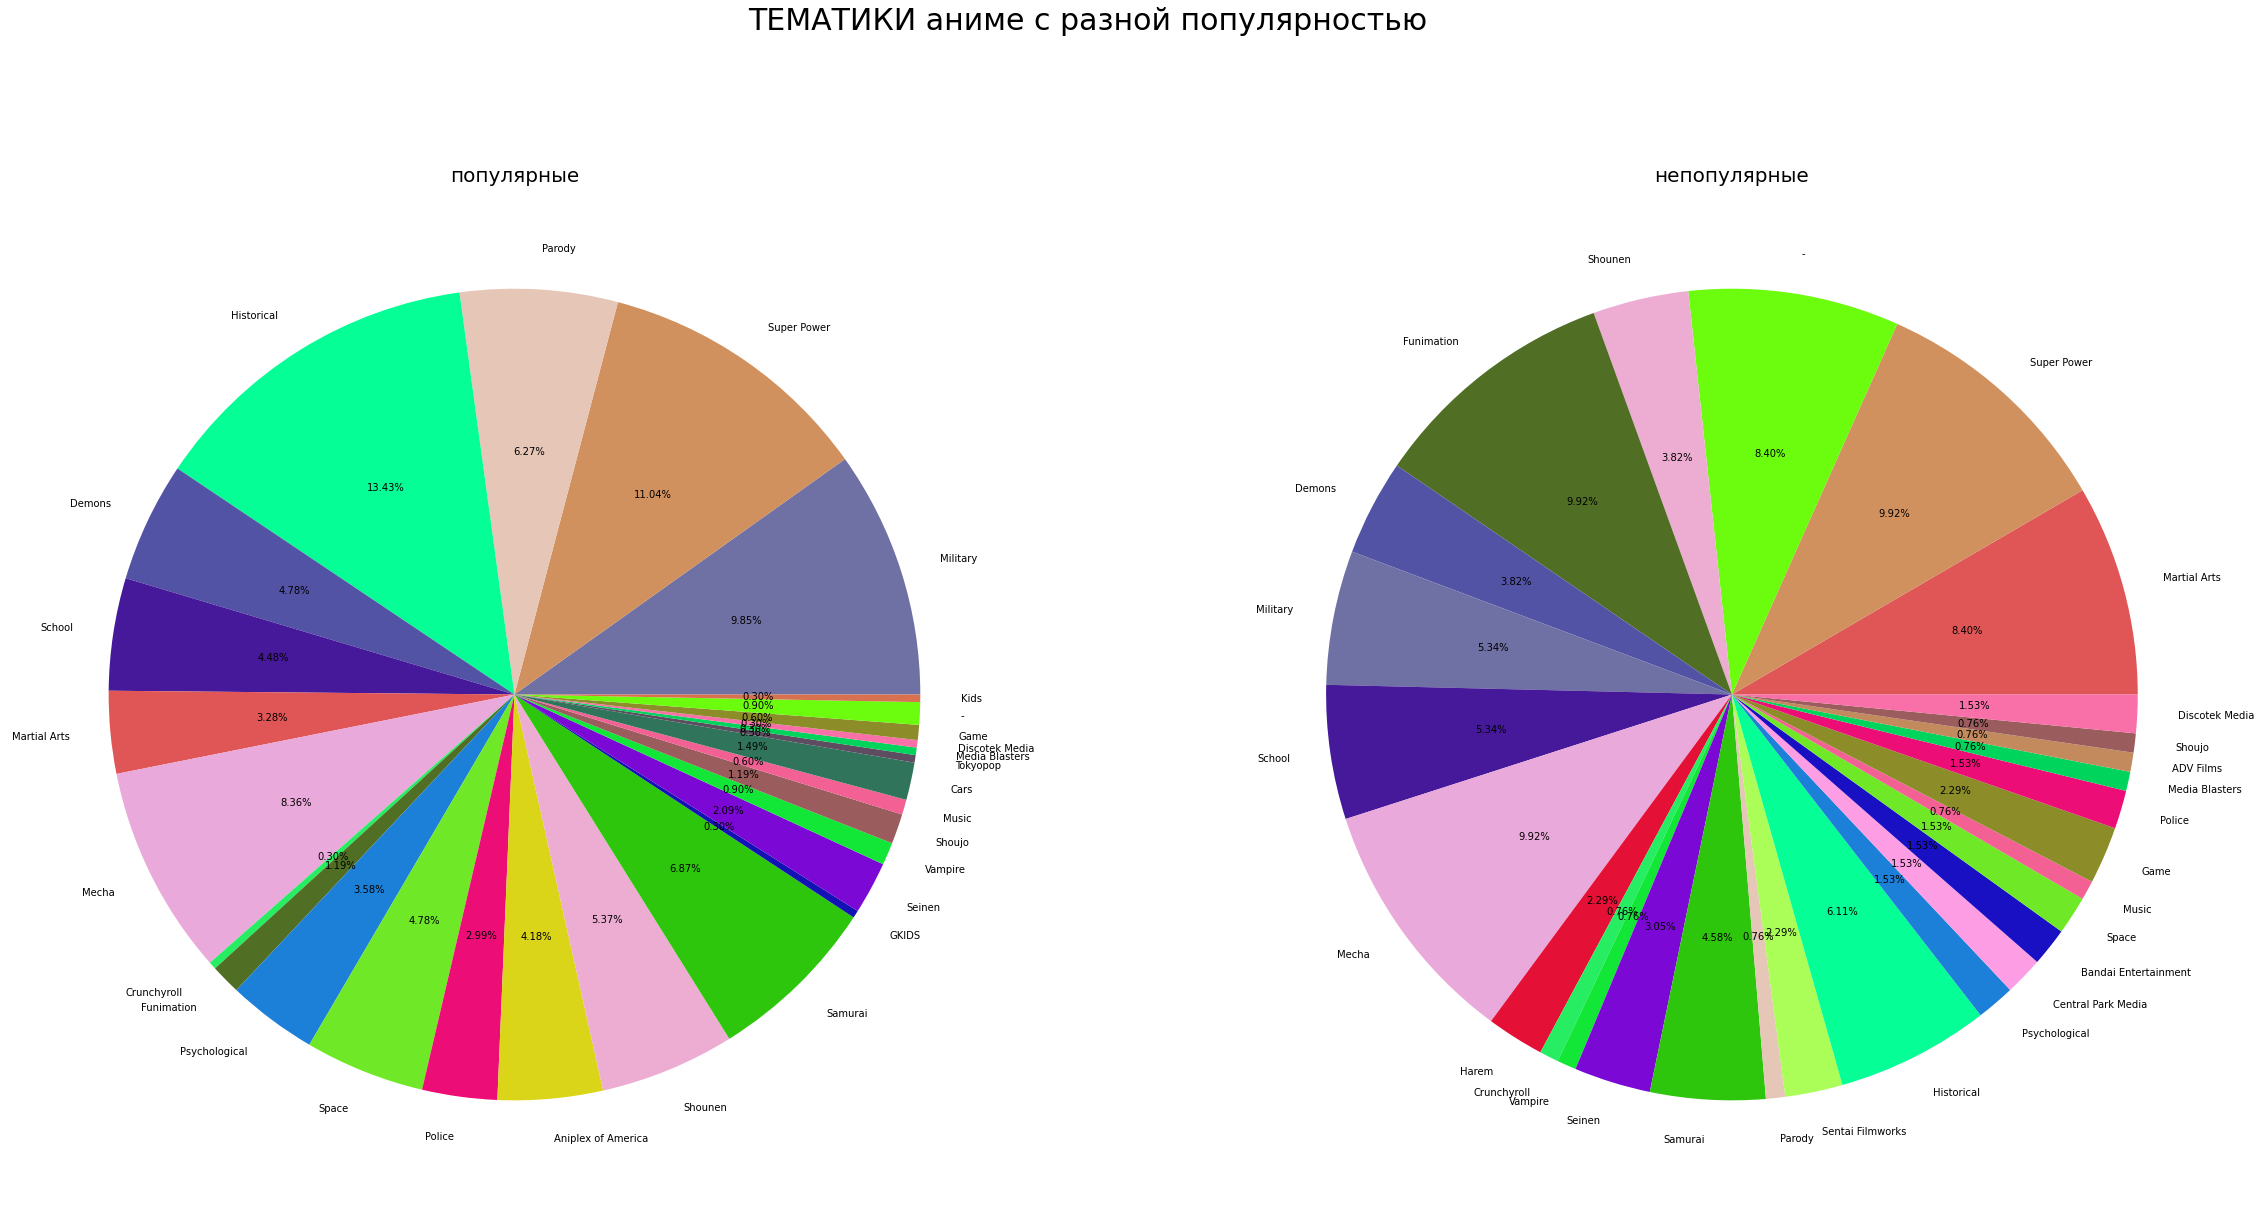

Historical, Militaty, Samurai and Parody are more popular


In [136]:
#fig = plt.figure(figsize=(10,10))
#size = popular_theme_dict.values()
#plt.pie(size, labels=popular_theme_dict.keys(),autopct='%1.2f%%')
#plt.title("Тематики популярных аниме")

#plt.show()

#fig = plt.figure(figsize=(10,10))
#size = not_popular_theme_dict.values()
#plt.pie(size, labels=not_popular_theme_dict.keys(),autopct='%1.2f%%')
#plt.title("Тематики непопулярных аниме")

#plt.show()
import random as random

colors = dict()
for theme in themes:
  colors[theme] = (random.random(), random.random(), random.random())
print(colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
fig.suptitle('ТЕМАТИКИ аниме с разной популярностью', fontsize=30)
ax1.pie(popular_theme_dict.values(), labels=popular_theme_dict.keys(),autopct='%1.2f%%', colors=[colors[key] for key in popular_theme_dict.keys()])
ax1.set_title("популярные", fontsize=20)
ax2.pie(not_popular_theme_dict.values(), labels=not_popular_theme_dict.keys(),autopct='%1.2f%%', colors=[colors[key] for key in not_popular_theme_dict.keys()])
ax2.set_title("непопулярные", fontsize=20)

plt.show()
print('Historical, Militaty, Samurai and Parody are more popular')

{'Tokyopop': (0.8584975214069366, 0.2235088557718381, 0.7488246752269249), 'Urban Vision': (0.33551317821452364, 0.42507997597332725, 0.8442718700640056), 'Psychological': (0.7972137921458938, 0.4487910538498253, 0.13919043193757374), 'Parody': (0.2653509971917972, 0.2005306781405981, 0.4548164142950891), 'Aniplex of America': (0.9436003084248669, 0.1240683072925235, 0.18489147750621138), 'School': (0.7738439701347478, 0.13912787633907508, 0.9804164125514239), 'Cars': (0.4969334165931725, 0.7103366312494976, 0.8588476007972905), 'Seinen': (0.9114466521119401, 0.21720953863994896, 0.8730865252449151), 'Ponycan USA': (0.8406538538790397, 0.7544522714372953, 0.22822346096044832), 'Sentai Filmworks': (0.9111288923126455, 0.03319624817344702, 0.6569156518458543), 'Shounen': (0.4744662300282795, 0.3134425655637284, 0.877937547337578), 'Discotek Media': (0.7771726042506268, 0.7248577910645072, 0.21525692635957117), 'Crunchyroll': (0.9893884209147897, 0.7579395829306675, 0.7050927183971921), '

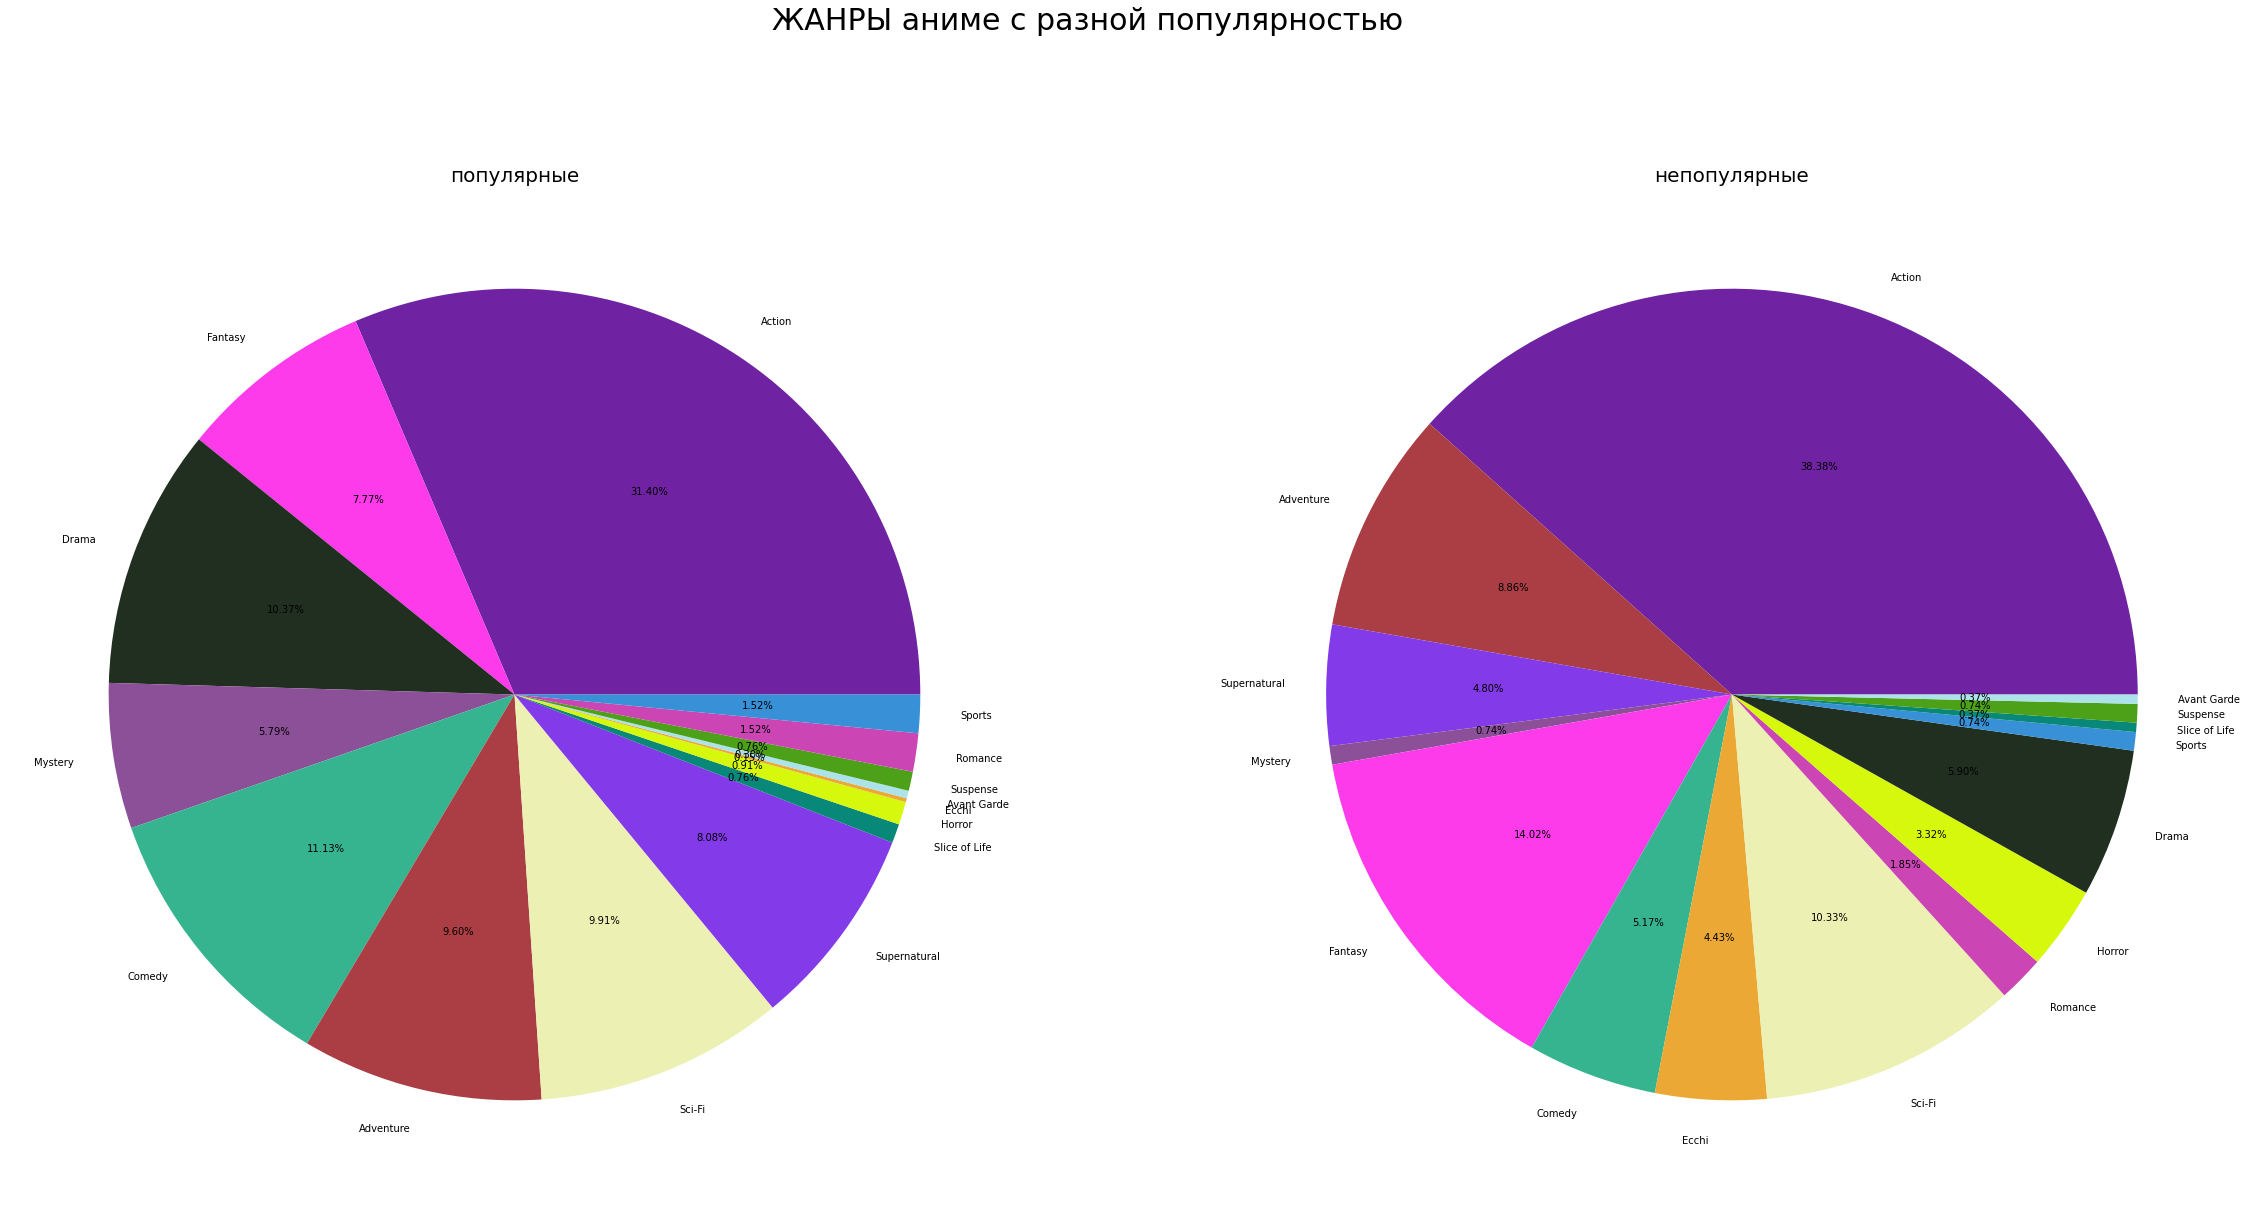

Comedy, Drama and Mystery are more popular


In [122]:
#fig = plt.figure(figsize=(10,10))
#size = popular_genre_dict.values()
#plt.pie(size, labels=popular_genre_dict.keys(),autopct='%1.2f%%')
#plt.title("Жанры популярных аниме")

#plt.show()

for genre in genres:
  colors[genre] = (random.random(), random.random(), random.random())
print(colors)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,20))
fig.suptitle('ЖАНРЫ аниме с разной популярностью', fontsize=30)
ax1.pie(popular_genre_dict.values(), labels=popular_genre_dict.keys(),autopct='%1.2f%%', colors=[colors[key] for key in popular_genre_dict.keys()])
ax1.set_title("популярные", fontsize=20)
ax2.pie(not_popular_genre_dict.values(), labels=not_popular_genre_dict.keys(),autopct='%1.2f%%', colors=[colors[key] for key in not_popular_genre_dict.keys()])
ax2.set_title("непопулярные", fontsize=20)

plt.show()

print('Comedy, Drama and Mystery are more popular')